# Comparison of spectrum between eNATL60 outputs and Alitka Satellite 

Requisites :
 - git clone https://github.com/auraoupa/gonzag_cloud
 


In [1]:
import sys,os
from os import getenv
import warnings
warnings.filterwarnings("ignore")

In [2]:
GONZAG_DIR = '/home/jovyan/gonzag_cloud' ; 
sys.path.append(GONZAG_DIR)
import gonzag as gz


## Params

For the model

In [3]:
model = 'eNATL60'
region = '1'
season = 'fma'
surf='surface_hourly'
name_mod = model+'-Region'+region+'-'+season
name_ssh_mod = 'sossheig'
name_lsm_mod = 'tmask' 
name_lat_mod = 'lat'
name_lon_mod = 'lon'
name_time_mod = 'time_counter'
l_griddist = False
period_mod = ['2010-02-01','2010-04-30']

For altimetry data

In [4]:
name_sat= 'Altika'
tag_sat_catalog = 'al'
name_ssh_sat='sla_unfiltered'
name_time_sat='time'
period_sat = ['2014-02-01','2014-04-30'] #should cover the same period of a different year if needed

## Data

In [5]:
import xarray as xr
import intake
import gcsfs

gcs = gcsfs.GCSFileSystem(requester_pays=True)

cat = intake.open_catalog('../../SWOT-AdAC/catalog.yaml')
dsmod1 = cat[model](region=region,depth=surf, season=season).to_dask()

In [6]:
dsmod1

<xarray.Dataset>
Dimensions:        (time_counter: 2136, x: 611, y: 763)
Coordinates: (12/15)
    depth          (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    ...             ...
    lat            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lon            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lat        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(72,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-02-01T00:30:00 ... 2010...
Dimensions without coordinates: x, y
Data variables: (12/13)
    fmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    qt_oce         (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    somecrty       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sometauy       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosaline       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sossheig       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    ...             ...
    sowaflup       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozocrtx       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozotaux       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    tmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    umask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    vmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>

In [7]:
if model == 'GIGATL':#get rid of 29th of february (2010 = leap year)
    import numpy as nmp
    from gonzag.io import GetTimeVector
    from gonzag.utils import scan_idx
    rvt = GetTimeVector( dsmod1, name_time_mod, lquiet=True )
    (rtu1,rtu2)=nmp.array(['2000-02-29T00:00:00','2000-03-01T00:00:00'], dtype='datetime64')
    jt1, jt2 = scan_idx( rvt, rtu1, rtu2 )
    dsmod=dsmod1.drop_isel(time=nmp.arange(jt1,jt2+1,1))
else:
    dsmod=dsmod1

In [8]:
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/altimetry.yaml")
dssat  = cat[tag_sat_catalog].to_dask()

In [9]:
dssat

<xarray.Dataset>
Dimensions:         (time: 34340107)
Coordinates:
    latitude        (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    longitude       (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
  * time            (time) datetime64[ns] 2013-03-14T05:44:50.445185 ... 2015...
Data variables:
    cycle           (time) int16 dask.array<chunksize=(34340107,), meta=np.ndarray>
    dac             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    lwe             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    mdt             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    ocean_tide      (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    sla_filtered    (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    sla_unfiltered  (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    track           (time) int16 dask.array<chunksize=(34340107,), meta=np.ndarray>
Attributes: (12/24)
    Conventions:               CF-1.6
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    cdm_data_type:             Swath
    comment:                   Sea surface height measured by altimeters refe...
    contact:                   servicedesk.cmems@mercator-ocean.eu
    creator_email:             servicedesk.cmems@mercator-ocean.eu
    ...                        ...
    software_version:          6.2_DUACS_DT2018_baseline
    source:                    Altika measurements
    ssalto_duacs_comment:      The reference mission used for the altimeter i...
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    summary:                   SSALTO/DUACS Delayed-Time Level-3 sea surface ...
    title:                     DT Altika Global Ocean Along track SSALTO/DUAC...

## Model and Satellite objects

In [10]:
ModelGrid = gz.ModGrid( dsmod, period_mod, name_lon_mod, name_lat_mod , name_time_mod, dsmod, name_lsm_mod, distorded_grid=False )



 *** what we use to define model land-sea mask:
    => "tmask" in dataset 

 *** Skipping computation of angle distortion of the model grid! ("-D" option not invoked)...

 *** About model gridded (source) domain:
     * shape =  (763, 611)
     * horizontal resolution:  0.016657295  degrees or  1.8507920147292316  km
     * Is this a global domain w.r.t longitude:  False
       ==> this is a regional domain
       ==> working in the [0:360] frame...
     * lon_min, lon_max =  281.97 292.16
     * lat_min, lat_max =  30.0 39.99
     * should we pay attention to possible STRONG local distorsion in the grid:  False
     * number of time records of interest for the interpolation to come:  2112
       ==> time record dates: 2010-02-01 to 2010-04-30, included



In [11]:
SatelliteTrack = gz.SatTrack( dssat, period_sat, name_time_sat, name_ssh_sat, domain_bounds=ModelGrid.domain_bounds, l_0_360=ModelGrid.l360 )

 *** [SatTrack()] Analyzing the time vector in dataset ...

 *** About satellite track (target) domain:
     * number of time records of interest for the interpolation to come:  10225
       ==> time record indices: 14883510 to 19033581, included

       separated in 86 tracks


In [12]:
ind=SatelliteTrack.keepit

In [13]:
len(ind[0])


10225

In [14]:
from gonzag.io import GetTimeVector, GetSatCoor, GetSatSSH

In [21]:
vssh = GetSatSSH( dssat, name_ssh_sat,  kt1=SatelliteTrack.jt1, kt2=SatelliteTrack.jt2-1)
cycle = GetSatSSH( dssat, 'cycle',  kt1=SatelliteTrack.jt1, kt2=SatelliteTrack.jt2-1)

In [16]:
vssh[ind]

<xarray.DataArray 'sla_unfiltered' (time: 10225)>
array([-0.011, -0.001,  0.026, ...,  0.056,  0.031,  0.051])
Coordinates:
    latitude   (time) float64 39.97 39.92 39.86 39.8 ... 30.21 30.15 30.1 30.04
    longitude  (time) float64 289.7 289.7 289.6 289.6 ... 287.5 287.5 287.5
  * time       (time) datetime64[ns] 2014-02-02T23:14:13.207444 ... 2014-04-2...
Attributes:
    comment:        The sea level anomaly is the sea surface height above mea...
    long_name:      Sea level anomaly not-filtered not-subsampled with dac, o...
    standard_name:  sea_surface_height_above_sea_level
    units:          m

In [17]:
len(SatelliteTrack.lat)

10225

In [23]:
cycle[ind]

<xarray.DataArray 'cycle' (time: 10225)>
array([10, 10, 10, ..., 12, 12, 12], dtype=int16)
Coordinates:
    latitude   (time) float64 39.97 39.92 39.86 39.8 ... 30.21 30.15 30.1 30.04
    longitude  (time) float64 289.7 289.7 289.6 289.6 ... 287.5 287.5 287.5
  * time       (time) datetime64[ns] 2014-02-02T23:14:13.207444 ... 2014-04-2...
Attributes:
    long_name:  Cycle the measurement belongs to
    units:      1

In [24]:
dssat_on_mod=xr.Dataset(
    data_vars=dict(
        sla_unfiltered=(["time"],vssh[ind]),
        lat=(["time"], SatelliteTrack.lat ),
        lon=(["time"], SatelliteTrack.lon ),
        cycle=(["time"], cycle[ind] ),
    ),
    coords=dict(
        time=SatelliteTrack.time,
    ),
    attrs=dict(description="cloud Altika data extracted for eNATL60 FMA month and Region1 area"),
)

In [25]:
dssat_on_mod.nbytes / (1024*1024)

0.3315448760986328

In [26]:
dssat_on_mod.to_netcdf(path='../results/results_Altika-eNATL60-Region1-fma/Altika-data-from-cloud-eNATL60-FMA-Region1-with-cycle.nc')

In [39]:
import xarray as xr
import sys
import glob
import numpy as nmp
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker

%matplotlib inline


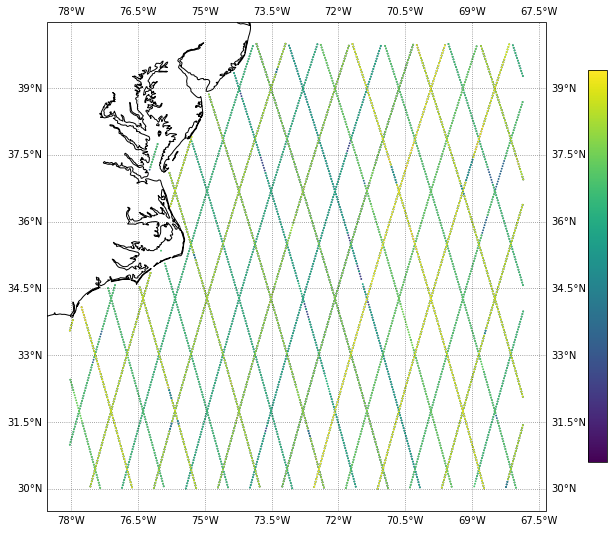

In [40]:
fig = plt.figure(num = 1, figsize=(15,9), facecolor='w', edgecolor='k')
ax = plt.subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(resolution="10m")

lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)

idx = SatelliteTrack.lon
idy = SatelliteTrack.lat
t = SatelliteTrack.time
cf = ax.scatter(idx, idy, c=t, cmap = 'viridis', marker='.', s=3 )
    
cbar = plt.colorbar(cf,shrink=0.8)
cbar.set_ticks([])

plt.savefig('../plots/data_'+name_sat+'-'+name_mod+'.png')
del fig,ax